In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('PCB Profile Data_FLW-VP1060N.csv', encoding='latin-1')
df.head()

,Pcb ID,Length (mm),Width (mm),Thickness (mm),Layers,Cu Thickness(Outer),Cu Thickness(Inner),SilkScreen,Solder Paste Type,T1(Degree Celsius),...,T6(Degree Celsius),T7(Degree Celsius),T8(Degree Celsius),T9(Degree Celsius),T10(Degree Celsius),Conveyar Speed(mm/min),Max Rising Slope,Soak Time,Reflow Time,Peak Temp
0,CT-117,165.10,118.80,0.8,2,35.0,0.0,0,QUALITEK 6701 NC SnPb,150,...,170,180,210,240,270,1200,2.24,48.47,67.74,217.67
1,CT-129,213.00,192.00,1.0,2,35.0,0.0,0,QUALITEK 6701 NC SnPb,150,...,170,180,200,230,275,1000,1.98,54.62,75.04,214.56
2,CT-132,212.85,154.00,1.5,2,35.0,0.0,0,QUALITEK 6701 NC SnPb,150,...,170,180,200,230,275,1100,1.62,56.95,67.50,211.09
3,CT-133,286.00,212.85,1.5,2,35.0,0.0,0,QUALITEK 6701 NC SnPb,150,...,170,180,200,230,275,1100,2.10,49.36,61.16,214.87
4,CT-135,264.00,196.00,1.6,4,35.0,35.0,0,QUALITEK 6701 NC SnPb,150,...,180,190,210,260,230,900,1.73,75.97,84.70,217.70


In [3]:
df.shape

(318, 24)

In [4]:
df.isnull().sum()

Pcb ID                    0
Length (mm)               0
Width (mm)                0
Thickness (mm)            0
Layers                    0
Cu Thickness(Outer)       0
Cu Thickness(Inner)       0
SilkScreen                0
Solder Paste Type         0
T1(Degree Celsius)        0
T2(Degree Celsius)        0
T3(Degree Celsius)        0
T4(Degree Celsius)        0
T5(Degree Celsius)        0
T6(Degree Celsius)        0
T7(Degree Celsius)        0
T8(Degree Celsius)        0
T9(Degree Celsius)        0
T10(Degree Celsius)       0
Conveyar Speed(mm/min)    0
Max Rising Slope          0
Soak Time                 0
Reflow Time               0
Peak Temp                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pcb ID                  318 non-null    object 
 1   Length (mm)             318 non-null    float64
 2   Width (mm)              318 non-null    float64
 3   Thickness (mm)          318 non-null    float64
 4   Layers                  318 non-null    int64  
 5   Cu Thickness(Outer)     318 non-null    float64
 6   Cu Thickness(Inner)     318 non-null    float64
 7   SilkScreen              318 non-null    int64  
 8   Solder Paste Type       318 non-null    object 
 9   T1(Degree Celsius)      318 non-null    int64  
 10  T2(Degree Celsius)      318 non-null    int64  
 11  T3(Degree Celsius)      318 non-null    int64  
 12  T4(Degree Celsius)      318 non-null    int64  
 13  T5(Degree Celsius)      318 non-null    int64  
 14  T6(Degree Celsius)      318 non-null    in

In [6]:
# 1. Create 'Area' feature as width * length
df['Area'] = df['Width (mm)'] * df['Length (mm)']

# 2. Create new feature for 'Cu Thickness (Outer)' * 2
df['Cu_Thickness_Outer_Modified'] = df.apply(
    lambda row: row['Cu Thickness(Outer)'] if row['Layers'] == 1 else 
                row['Cu Thickness(Outer)'] * 2 if row['Layers'] > 1 else 
                None, 
    axis=1
)
df['Cu_Thickness_Outer_Modified'] = df['Cu_Thickness_Outer_Modified'] * 10**-6

# 3. Create new feature for 'Cu Thickness (Inner)' * (Layers - 2), ensuring no negative layers
df['Cu_Thickness_Inner_Modified'] = df.apply(
    lambda row: (row['Layers'] - 2) * row['Cu Thickness(Inner)'] if row['Layers'] > 2 else None,
    axis=1
)
df['Cu_Thickness_Inner_Modified'] = df['Cu_Thickness_Inner_Modified'] * 10**-6

In [7]:
# Replacing NaN values with 0 in the modified thickness columns
df['Cu_Thickness_Outer_Modified'].fillna(0, inplace=True)
df['Cu_Thickness_Inner_Modified'].fillna(0, inplace=True)

df[['Area', 'Cu_Thickness_Outer_Modified', 'Cu_Thickness_Inner_Modified']].head()

C:\Users\ASM PROCESS ENGINE\AppData\Local\Temp\ipykernel_14040\911092389.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cu_Thickness_Outer_Modified'].fillna(0, inplace=True)
C:\Users\ASM PROCESS ENGINE\AppData\Local\Temp\ipykernel_14040\911092389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,Area,Cu_Thickness_Outer_Modified,Cu_Thickness_Inner_Modified
0,19613.88,0.00007,0.00000
1,40896.00,0.00007,0.00000
2,32778.90,0.00007,0.00000
3,60875.10,0.00007,0.00000
4,51744.00,0.00007,0.00007


In [8]:
df['Solder Paste Type'].value_counts()

Solder Paste Type
Koki S3X58-M406-3        288
QUALITEK 6701 NC SnPb     30
Name: count, dtype: int64

In [9]:
# Perform one-hot encoding on the 'Solder Paste Type' column
df = pd.get_dummies(df, columns=['Solder Paste Type'], drop_first=False)
# Rename columns by removing the 'Solder Paste Type_' prefix
df.columns = df.columns.str.replace('Solder Paste Type_', '')
# Convert the one-hot encoded columns to integer type (0 and 1)
df[df.columns[-2:]] = df[df.columns[-2:]].astype(int)  # Assuming these are the last two columns

# Check the first few rows to see the new one-hot encoded columns
df.head()

,Pcb ID,Length (mm),Width (mm),Thickness (mm),Layers,Cu Thickness(Outer),Cu Thickness(Inner),SilkScreen,T1(Degree Celsius),T2(Degree Celsius),...,Conveyar Speed(mm/min),Max Rising Slope,Soak Time,Reflow Time,Peak Temp,Area,Cu_Thickness_Outer_Modified,Cu_Thickness_Inner_Modified,Koki S3X58-M406-3,QUALITEK 6701 NC SnPb
0,CT-117,165.10,118.80,0.8,2,35.0,0.0,0,150,180,...,1200,2.24,48.47,67.74,217.67,19613.88,0.00007,0.00000,0,1
1,CT-129,213.00,192.00,1.0,2,35.0,0.0,0,150,170,...,1000,1.98,54.62,75.04,214.56,40896.00,0.00007,0.00000,0,1
2,CT-132,212.85,154.00,1.5,2,35.0,0.0,0,150,170,...,1100,1.62,56.95,67.50,211.09,32778.90,0.00007,0.00000,0,1
3,CT-133,286.00,212.85,1.5,2,35.0,0.0,0,150,170,...,1100,2.10,49.36,61.16,214.87,60875.10,0.00007,0.00000,0,1
4,CT-135,264.00,196.00,1.6,4,35.0,35.0,0,150,170,...,900,1.73,75.97,84.70,217.70,51744.00,0.00007,0.00007,0,1


In [10]:
df = df.drop(columns=['Pcb ID', 'Length (mm)', 'Width (mm)', 'Cu Thickness(Outer)', 'Cu Thickness(Inner)','SilkScreen'])
df.head(25)

,Thickness (mm),Layers,T1(Degree Celsius),T2(Degree Celsius),T3(Degree Celsius),T4(Degree Celsius),T5(Degree Celsius),T6(Degree Celsius),T7(Degree Celsius),T8(Degree Celsius),...,Conveyar Speed(mm/min),Max Rising Slope,Soak Time,Reflow Time,Peak Temp,Area,Cu_Thickness_Outer_Modified,Cu_Thickness_Inner_Modified,Koki S3X58-M406-3,QUALITEK 6701 NC SnPb
0,0.80,2,150,180,170,170,170,170,180,210,...,1200,2.24,48.47,67.74,217.67,19613.880000,0.00007,0.00000,0,1
1,1.00,2,150,170,160,160,170,170,180,200,...,1000,1.98,54.62,75.04,214.56,40896.000000,0.00007,0.00000,0,1
2,1.50,2,150,170,160,160,170,170,180,200,...,1100,1.62,56.95,67.50,211.09,32778.900000,0.00007,0.00000,0,1
3,1.50,2,150,170,160,160,170,170,180,200,...,1100,2.10,49.36,61.16,214.87,60875.100000,0.00007,0.00000,0,1
4,1.60,4,150,170,160,160,160,180,190,210,...,900,1.73,75.97,84.70,217.70,51744.000000,0.00007,0.00007,0,1
5,1.60,2,150,170,160,170,160,160,180,210,...,900,2.08,77.99,83.88,220.75,55120.082800,0.00007,0.00000,0,1
6,1.50,2,150,180,170,170,170,170,180,210,...,1200,2.10,53.84,77.86,219.47,39435.275968,0.00007,0.00000,0,1
7,1.60,4,150,170,160,160,170,170,180,200,...,1000,1.98,54.62,75.04,214.56,54464.202984,0.00007,0.00007,0,1
8,1.00,4,150,170,160,160,170,170,180,200,...,1000,1.99,51.51,70.75,220.95,60875.100000,0.00007,0.00007,0,1
9,1.60,2,150,170,160,170,160,160,180,210,...,900,2.08,77.99,83.88,220.75,53335.500000,0.00007,0.00000,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Thickness (mm)               318 non-null    float64
 1   Layers                       318 non-null    int64  
 2   T1(Degree Celsius)           318 non-null    int64  
 3   T2(Degree Celsius)           318 non-null    int64  
 4   T3(Degree Celsius)           318 non-null    int64  
 5   T4(Degree Celsius)           318 non-null    int64  
 6   T5(Degree Celsius)           318 non-null    int64  
 7   T6(Degree Celsius)           318 non-null    int64  
 8   T7(Degree Celsius)           318 non-null    int64  
 9   T8(Degree Celsius)           318 non-null    int64  
 10  T9(Degree Celsius)           318 non-null    int64  
 11  T10(Degree Celsius)          318 non-null    int64  
 12  Conveyar Speed(mm/min)       318 non-null    int64  
 13  Max Rising Slope    

In [12]:
# Export the current DataFrame to an Excel file
#df.to_excel('exported_dataset_New.xlsx', index=False)

# Confirm the file has been saved by showing the file path or content (optional)
#print("Data exported to 'exported_dataset.xlsx'")

Data exported to 'exported_dataset.xlsx'


In [13]:
df.corr()['Max Rising Slope']

Thickness (mm)                -0.035296
Layers                         0.009753
T1(Degree Celsius)             0.153996
T2(Degree Celsius)             0.130776
T3(Degree Celsius)            -0.022719
T4(Degree Celsius)             0.020947
T5(Degree Celsius)            -0.113501
T6(Degree Celsius)             0.008359
T7(Degree Celsius)            -0.026532
T8(Degree Celsius)             0.065544
T9(Degree Celsius)             0.154369
T10(Degree Celsius)            0.096480
Conveyar Speed(mm/min)         0.160028
Max Rising Slope               1.000000
Soak Time                      0.231848
Reflow Time                   -0.356998
Peak Temp                      0.386071
Area                          -0.002539
Cu_Thickness_Outer_Modified   -0.010582
Cu_Thickness_Inner_Modified    0.008813
Koki S3X58-M406-3              0.186593
QUALITEK 6701 NC SnPb         -0.186593
Name: Max Rising Slope, dtype: float64

Trial 50 Complete [00h 00m 16s]
val_loss: 0.030503857880830765

Best val_loss So Far: 0.023996317759156227
Total elapsed time: 00h 24m 14s


c:\Users\ASM PROCESS ENGINE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 288)            │         9,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 240)            │        69,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 896)            │       215,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │        14,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309,841 (1.18 MB)

 Trainable params: 309,841 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0240
Best model test loss: 0.023996317759156227
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted: [2.250385], Actual: [2.27]
Predicted: [2.1307838], Actual: [1.79]
Predicted: [2.11055], Actual: [2.22]
Predicted: [2.2631223], Actual: [1.83]
Predicted: [2.11055], Actual: [2.08]
Best hyperparameters: {'num_layers': 5, 'units_layer_0': 32, 'activation_layer_0': 'relu', 'dropout_layer_0': 0.1, 'learning_rate': 0.008848201678019835, 'units_layer_1': 288, 'activation_layer_1': 'relu', 'dropout_layer_1': 0.4, 'units_layer_2': 240, 'activation_layer_2': 'relu', 'dropout_layer_2': 0.5, 'units_layer_3': 896, 'activation_layer_3': 'tanh', 'dropout_layer_3': 0.30000000000000004, 'units_layer_4': 16, 'activation_layer_4': 'relu', 'dropout_layer_4': 0.4, 'units_layer_5': 896, 'activation_layer_5': 'relu', 'dropout_layer_5': 0.45000000000000007}


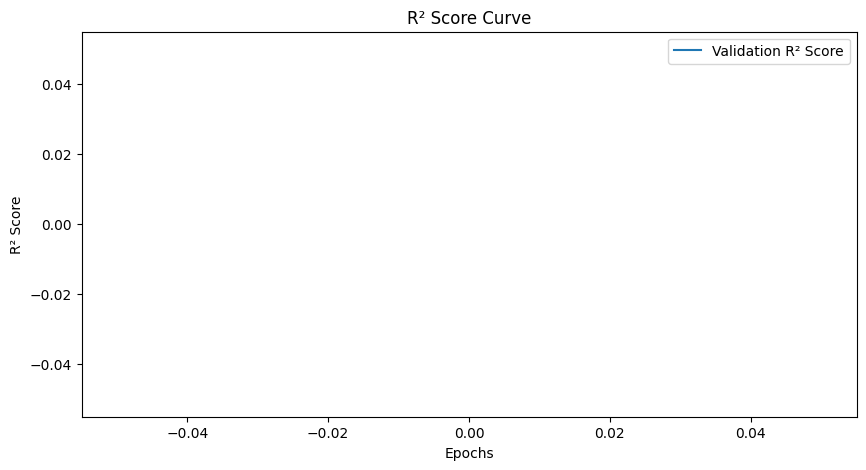

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Prepare features (X) and labels (Y)
X = df.drop(['Max Rising Slope', 'Soak Time', 'Reflow Time', 'Peak Temp'], axis=1)  # Drop target columns from features
Y = df[['Max Rising Slope']]  # Multi-output labels

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

# Scale the features and labels
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.1, random_state=42)

# Custom callback to track R² score
class R2ScoreCallback(Callback):
    def __init__(self, X_val, Y_val):
        self.X_val = X_val
        self.Y_val = Y_val
        self.r2_scores = []

    def on_epoch_end(self, epoch, logs=None):
        predictions = self.model.predict(self.X_val)
        predictions = scaler_Y.inverse_transform(predictions)
        Y_val_original = scaler_Y.inverse_transform(self.Y_val)
        r2 = r2_score(Y_val_original, predictions)
        self.r2_scores.append(r2)
        print(f"Epoch {epoch+1}: R² score = {r2}")

r2_callback = R2ScoreCallback(X_test, Y_test)

# Function to build the model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Input layer

    # Tune number of hidden layers (let's say between 1 to 3 hidden layers)
    num_layers = hp.Int('num_layers', min_value=1, max_value=6)

    # Add Dense layers dynamically based on the number of layers
    for i in range(num_layers):
        model.add(Dense(units=hp.Int(f'units_layer_{i}', min_value=16, max_value=1024, step=16), 
                        activation=hp.Choice(f'activation_layer_{i}', values=['relu', 'tanh'])))
        
        # Optionally add Dropout layer after each Dense layer
        model.add(Dropout(rate=hp.Float(f'dropout_layer_{i}', min_value=0.1, max_value=0.5, step=0.05)))

    # Output layer for multi-output regression (unchanged)
    model.add(Dense(1))  # Output for 4 labels

    # Compile model with Adam optimizer and tunable learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, sampling='log')),
                  loss='mean_squared_error')
    
    return model

# Set up the Keras Tuner with Bayesian Optimization
tuner = RandomSearch(
    build_model,            # Function that builds the model
    objective='val_loss',    # Targeting validation loss
    max_trials=500,          # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build for each combination (averaged performance)
    directory='keras_tuner_dir',
    project_name='pcb_nn_tuning'
)


# Search for the best model
tuner.search(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks=[r2_callback], batch_size=32)

# Get the best model found by Keras Tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Print the architecture of the best model
best_model.summary()

# Evaluate the model on the test set
loss = best_model.evaluate(X_test, Y_test)
print(f'Best model test loss: {loss}')

# Make predictions on the test set using the best model
predictions_scaled = best_model.predict(X_test)

# Inverse transform the predictions and actual values to get them back to the original scale
predictions = scaler_Y.inverse_transform(predictions_scaled)
Y_test_original = scaler_Y.inverse_transform(Y_test)

# Print a few predictions and actual values in their original (unscaled) form
for i in range(5):
    print(f"Predicted: {predictions[i]}, Actual: {Y_test_original[i]}")

# Retrieve and display the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Plot the R² Score Curve
plt.figure(figsize=(10, 5))
plt.plot(r2_callback.r2_scores, label='Validation R² Score')
plt.title('R² Score Curve')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.legend()
plt.show()


In [58]:
"""import os
import shutil

# Define the tuner directory (this should match the directory you specified in the tuner)
tuner_directory = 'keras_tuner_dir'

# Check if the directory exists, and if so, delete it
if os.path.exists(tuner_directory):
    shutil.rmtree(tuner_directory)  # Remove the entire directory and its contents
    print(f"Removed previous tuner directory: {tuner_directory}")
else:
    print("No previous tuner directory found.")"""


Removed previous tuner directory: keras_tuner_dir
